In [1]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import glob
import os
import re
from shutil import copyfile
import seaborn as sns
from collections import Counter
%matplotlib inline

In [2]:
dall_scores = pd.concat([pd.read_csv(f, sep='\s+', header=1) for f in glob.glob('*_input_*/score.sc')], ignore_index = True)
print(dall_scores)

      SCORE:  total_score  angle_constraint  atom_pair_constraint  \
0     SCORE:     -936.739               0.0                   0.0   
1     SCORE:     -935.763               0.0                   0.0   
2     SCORE:     -935.374               0.0                   0.0   
3     SCORE:     -937.205               0.0                   0.0   
4     SCORE:     -935.004               0.0                   0.0   
5     SCORE:     -937.300               0.0                   0.0   
6     SCORE:     -936.734               0.0                   0.0   
7     SCORE:     -937.495               0.0                   0.0   
8     SCORE:     -935.308               0.0                   0.0   
9     SCORE:     -937.768               0.0                   0.0   
10    SCORE:     -933.949               0.0                   0.0   
11    SCORE:     -930.601               0.0                   0.0   
12    SCORE:     -931.382               0.0                   0.0   
13    SCORE:     -931.694         

In [3]:
dscore_per_design = pd.DataFrame()
dscore_per_design = dscore_per_design.append([pd.read_csv(f, sep='\s+', header=1).mean() for f in glob.glob('*_input_*/score.sc')], ignore_index = True)
print(dscore_per_design)


     total_score  angle_constraint  atom_pair_constraint  dihedral_constraint  \
0      -936.4690               0.0                   0.0               0.5971   
1      -932.3361               0.0                   0.0               1.1049   
2      -966.2042               0.0                   0.0               1.0763   
3      -925.3767               0.0                   0.0               1.6079   
4      -949.4023               0.0                   0.0               0.7268   
5      -949.8748               0.0                   0.0               1.0918   
6      -912.1571               0.0                   0.0               1.8678   
7      -952.8560               0.0                   0.0               1.7127   
8      -937.7589               0.0                   0.0               0.9875   
9      -925.8661               0.0                   0.0               1.4571   
10     -923.5663               0.0                   0.0               1.4233   
11     -940.8387            

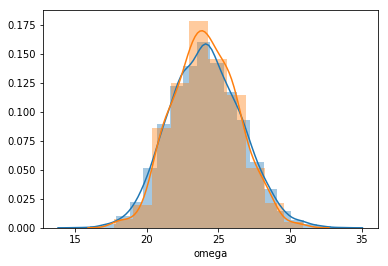

In [4]:
sns.distplot(dall_scores["omega"], bins=20)
sns.distplot(dscore_per_design["omega"], bins=10)

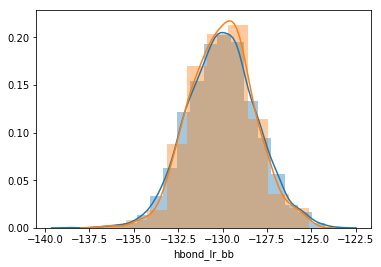

In [5]:
sns.distplot(dall_scores["hbond_lr_bb"], bins=20)
sns.distplot(dscore_per_design["hbond_lr_bb"], bins=10)

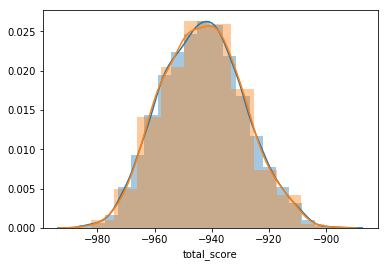

In [6]:
sns.distplot(dall_scores["total_score"], bins=20)
sns.distplot(dscore_per_design["total_score"], bins=10)

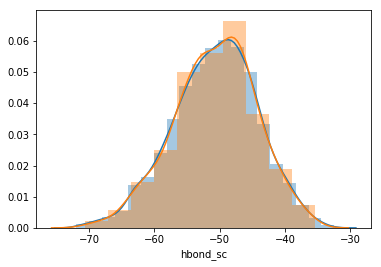

In [7]:
sns.distplot(dall_scores["hbond_sc"], bins=20)
sns.distplot(dscore_per_design["hbond_sc"], bins=10)

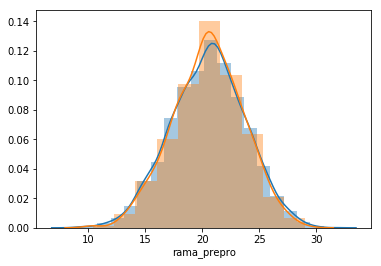

In [8]:
sns.distplot(dall_scores["rama_prepro"], bins=20)
sns.distplot(dscore_per_design["rama_prepro"], bins=10)

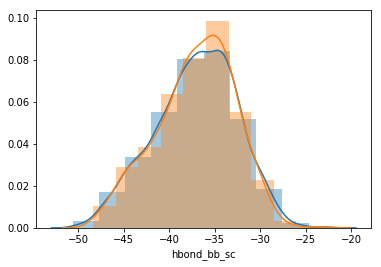

In [9]:
sns.distplot(dall_scores["hbond_bb_sc"], bins=10)
sns.distplot(dscore_per_design["hbond_bb_sc"], bins=10)

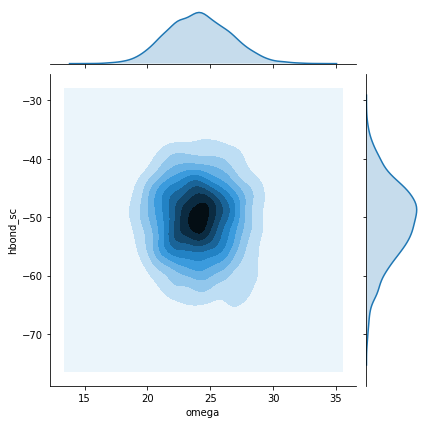

In [10]:
sns.jointplot("omega", "hbond_sc", dall_scores, kind='kde')

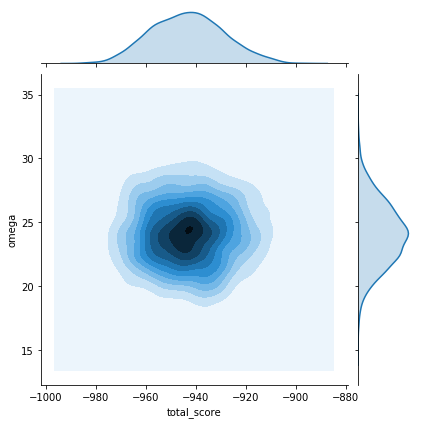

In [11]:
sns.jointplot("total_score", "omega", dall_scores, kind='kde')

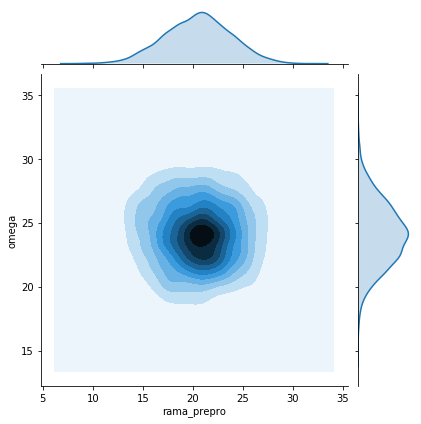

In [12]:
sns.jointplot("rama_prepro", "omega", dall_scores, kind='kde')

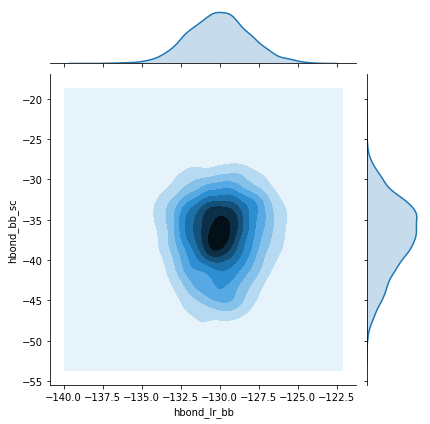

In [13]:
sns.jointplot("hbond_lr_bb", "hbond_bb_sc", dall_scores, kind='kde')

In [14]:
dall_scores["design"] = dall_scores.description.apply(lambda x: "_".join(x.split("_")[:-1]))
dall_scores.groupby(['design'], sort=False)['total_score'].max()

design
96_input_0084_0003_16_0007_0009_0008_0007   -935.004
96_input_0084_0004_24_0010_0009_0007_0002   -927.965
32_input_0059_0005_7_0001_0010_0003_0008    -961.419
76_input_0089_0002_11_0006_0002_0007_0002   -922.033
96_input_0084_0003_22_0001_0004_0005_0010   -938.843
60_input_0076_0004_13_0008_0001_0003_0008   -946.903
96_input_0084_0005_6_0006_0009_0009_0007    -907.345
89_input_0033_0002_5_0001_0001_0009_0009    -945.505
23_input_0025_0004_8_0004_0007_0003_0002    -931.647
9_input_0061_0001_11_0005_0005_0007_0002    -921.588
6_input_0012_0003_24_0009_0007_0009_0005    -915.998
42_input_0068_0004_12_0009_0006_0005_0004   -935.105
32_input_0059_0005_10_0007_0001_0003_0009   -959.941
63_input_0093_0003_16_0002_0003_0007_0005   -928.430
96_input_0084_0003_24_0009_0008_0003        -946.264
64_input_0084_0002_10_0001_0006_0008        -945.242
64_input_0084_0002_10_0009_0007_0006_0009   -927.628
75_input_0022_0004_8_0007_0005_0006_0005    -941.095
64_input_0084_0002_10_0009_0007_0003_00

In [15]:
idx = dall_scores.groupby(['design'])['total_score'].transform(max) == dall_scores['total_score']

dpicked = dall_scores[idx]
print(dpicked)

      SCORE:  total_score  angle_constraint  atom_pair_constraint  \
4     SCORE:     -935.004               0.0                   0.0   
17    SCORE:     -927.965               0.0                   0.0   
22    SCORE:     -961.419               0.0                   0.0   
38    SCORE:     -922.033               0.0                   0.0   
40    SCORE:     -938.843               0.0                   0.0   
51    SCORE:     -946.903               0.0                   0.0   
64    SCORE:     -907.345               0.0                   0.0   
79    SCORE:     -945.505               0.0                   0.0   
86    SCORE:     -931.647               0.0                   0.0   
91    SCORE:     -921.588               0.0                   0.0   
104   SCORE:     -915.998               0.0                   0.0   
119   SCORE:     -935.105               0.0                   0.0   
123   SCORE:     -959.941               0.0                   0.0   
139   SCORE:     -928.430         

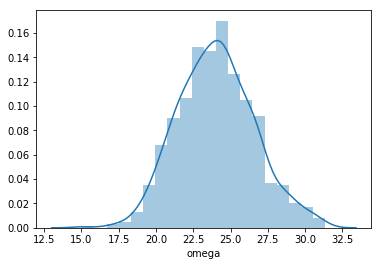

In [16]:
sns.distplot(dpicked["omega"], bins=20)

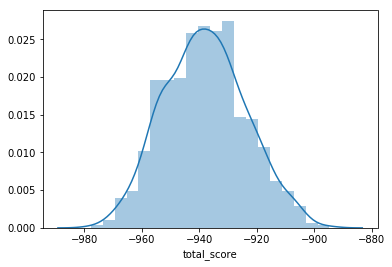

In [17]:
sns.distplot(dpicked["total_score"], bins=20)

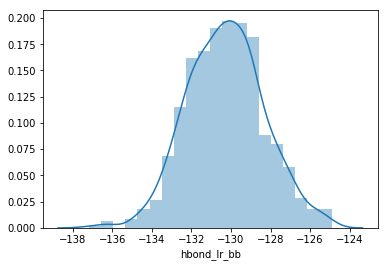

In [18]:
sns.distplot(dpicked["hbond_lr_bb"], bins=20)

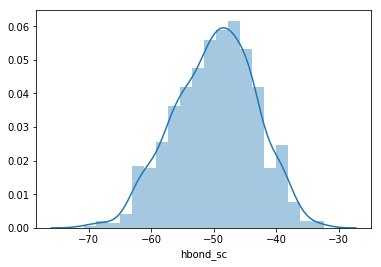

In [19]:
sns.distplot(dpicked["hbond_sc"], bins=20)

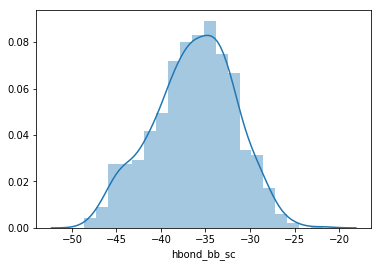

In [20]:
sns.distplot(dpicked["hbond_bb_sc"], bins=20)

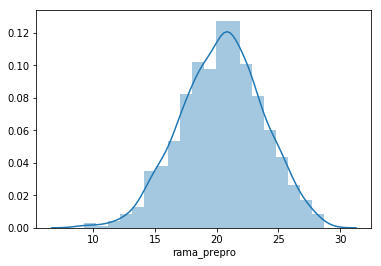

In [21]:
sns.distplot(dpicked["rama_prepro"], bins=20)

In [25]:
dpicked_2 = dpicked.loc[dpicked["omega"] < 25.5]
dpicked_2

,SCORE:,total_score,angle_constraint,atom_pair_constraint,dihedral_constraint,dslf_fa13,fa_atr,fa_dun,fa_elec,fa_intra_rep,...,hbond_sr_bb,lk_ball_wtd,omega,p_aa_pp,pro_close,rama_prepro,ref,yhh_planarity,description,design
4,SCORE:,-935.004,0.0,0.0,0.615,0.0,-1022.679,195.820,-412.609,1.976,...,-27.540,4.116,24.113,-44.068,1.068,23.709,57.119,1.459,96_input_0084_0003_16_0007_0009_0008_0007_0005,96_input_0084_0003_16_0007_0009_0008_0007
17,SCORE:,-927.965,0.0,0.0,1.277,0.0,-997.132,195.159,-416.563,1.941,...,-27.316,3.520,24.368,-49.972,0.945,20.633,57.512,1.110,96_input_0084_0004_24_0010_0009_0007_0002_0008,96_input_0084_0004_24_0010_0009_0007_0002
22,SCORE:,-961.419,0.0,0.0,1.644,0.0,-967.402,217.702,-469.546,1.811,...,-30.877,13.123,21.198,-47.063,1.208,24.908,6.008,0.668,32_input_0059_0005_7_0001_0010_0003_0008_0003,32_input_0059_0005_7_0001_0010_0003_0008
40,SCORE:,-938.843,0.0,0.0,1.142,0.0,-987.600,204.388,-433.961,1.878,...,-26.866,6.867,20.682,-46.120,1.086,17.342,43.943,0.988,96_input_0084_0003_22_0001_0004_0005_0010_0001,96_input_0084_0003_22_0001_0004_0005_0010
51,SCORE:,-946.903,0.0,0.0,0.679,0.0,-957.651,206.521,-470.631,1.844,...,-27.385,6.066,24.162,-41.263,1.144,14.869,16.509,2.450,60_input_0076_0004_13_0008_0001_0003_0008_0002,60_input_0076_0004_13_0008_0001_0003_0008
64,SCORE:,-907.345,0.0,0.0,2.341,0.0,-1018.875,192.705,-391.819,2.062,...,-30.694,0.743,23.156,-50.494,0.966,22.946,72.290,1.339,96_input_0084_0005_6_0006_0009_0009_0007_0005,96_input_0084_0005_6_0006_0009_0009_0007
79,SCORE:,-945.505,0.0,0.0,1.953,0.0,-974.437,221.888,-459.551,1.917,...,-31.463,9.464,25.137,-44.130,0.868,18.581,16.958,1.099,89_input_0033_0002_5_0001_0001_0009_0009_0010,89_input_0033_0002_5_0001_0001_0009_0009
86,SCORE:,-931.647,0.0,0.0,0.982,0.0,-1002.681,216.554,-443.093,1.955,...,-30.784,1.913,21.465,-45.411,1.240,18.983,40.213,0.476,23_input_0025_0004_8_0004_0007_0003_0002_0007,23_input_0025_0004_8_0004_0007_0003_0002
91,SCORE:,-921.588,0.0,0.0,1.837,0.0,-965.606,199.794,-413.195,1.888,...,-32.839,3.270,22.758,-46.863,1.167,19.820,43.686,0.778,9_input_0061_0001_11_0005_0005_0007_0002_0002,9_input_0061_0001_11_0005_0005_0007_0002
119,SCORE:,-935.105,0.0,0.0,0.652,0.0,-1019.554,211.711,-422.713,2.010,...,-31.755,2.013,23.313,-45.188,0.925,14.561,45.531,0.866,42_input_0068_0004_12_0009_0006_0005_0004_0010,42_input_0068_0004_12_0009_0006_0005_0004


In [26]:
from shutil import copyfile

for index,row in dpicked_2.iterrows():
    pdb = row["description"] + ".pdb"
    source = row["design"] + "/" + pdb
    target = "../picked_B/" + pdb
    copyfile(source, target)